# Tarea Semanal 6

 1) Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:
 <div>
<img src="img/RespuestaPedidaTs6.PNG" alt="Drawing" style="width: 600px;"/>
</div>

 
Determine la expresión de H(s) del filtro pasa-altos normalizado                    
Realizar el diagrama de polos y ceros de H(s)                                             
Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

 <div>
<img src="img/estructuraActivaTs6.PNG" alt="Drawing" style="width: 600px;"/>
</div>

Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:

 <div>
<img src="img/redPropuestaShaumanTs6.PNG" alt="Drawing" style="width: 600px;"/>
</div>


### Diseño de Butterworth
#### Voy a usar butter, asi trabajo con maxima planicidad y valores de Q conocidos

$ Q_{orden2Butter} = \frac{\sqrt{2}}{2} $  
$ W_n (dato) = 300 Hz $  
$ T_{PB} = \frac{W_n^2}{s^2 + s \cdot \frac{W_n}{Q} + W_n^2} $  
$ T_{PB} = \frac{300^2}{s^2 + s \cdot \frac{600}{\sqrt{2}} + 300^2} $  

#### Le agrego el cero pero manteniendo en en s->0 tengo 0dB

$ T_{PB} = \frac{(s^2 + 100^2) \cdot 9}{s^2 + s \cdot \frac{600}{\sqrt{2}} + 300^2} $  

Si hago esto lo que tengo es una pasabanda asi que lo multiplico por la transferencia del pasabajos para mantener la respuesta

$ T = \frac{(s^2 + 100^2) \cdot 9}{s^2 + s \cdot \frac{600}{\sqrt{2}} + 300^2} \cdot \frac{300}{s + 300}$  

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

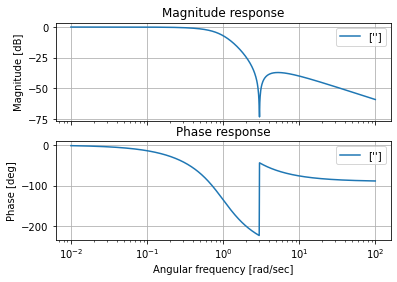

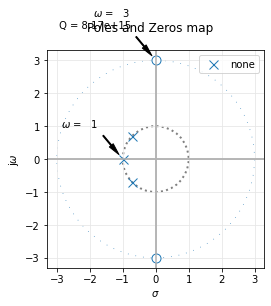

In [3]:
# Transferencia PB de plantilla

from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

K = 1/9
w01 = 1  
Q1 = np.sqrt(2)/2

numerador1 =   [K,   0   , (3)**2 * K]
denominador1 = [1, w01/Q1, w01**2]
numerador2 = [w01]
denominador2 = [1, w01]

numerador = np.polymul(numerador1 , numerador2)
denominador = np.polymul(denominador1 , denominador2)

my_tf1 = TransferFunction(numerador, denominador)

bodePlot(my_tf1,1)

pzmap(my_tf1,2)

## Transferencia normalizada del pasa bajos

$ T(s) = \frac{1}{9} \cdot \frac{(s^2 + 3^2)}{s^2 + s \cdot \frac{2}{\sqrt{2}} + 1^2} \cdot \frac{1}{s + 1} $  

### Transformación a pasa altos
Núcleo de transformación $ s = \frac{1}{s} $  
$ T(s) = \frac{1}{9} \cdot \frac{(\frac{1}{s}^2 + 3^2)}{\frac{1}{s}^2 + \frac{1}{s} \cdot \frac{2}{\sqrt{2}} + 1^2} \cdot \frac{1}{\frac{1}{s} + 1} $  
$ T(s) = \frac{1}{9} \cdot \frac{\frac{1 + 3^2 s^2}{s^2}}{\frac{1 + s \cdot \frac{2}{\sqrt{2}} + s^2}{s^2}} \cdot \frac{1}{\frac{1 + s}{s}} $  
$ T(s) = \frac{1}{9} \cdot \frac{1 + 3^2 s^2}{1 + s \cdot \frac{2}{\sqrt{2}} + s^2} \cdot \frac{s}{1 + s} $  
$ T(s) = \frac{\frac{1}{9} + s^2}{1 + s \cdot \frac{2}{\sqrt{2}} + s^2} \cdot \frac{s}{1 + s} $  
$ T(s) = \frac{s^2 + \frac{1}{9}}{s^2 + s \cdot \frac{2}{\sqrt{2}} + 1} \cdot \frac{s}{s + 1} $  

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

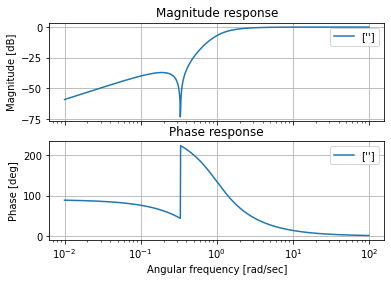

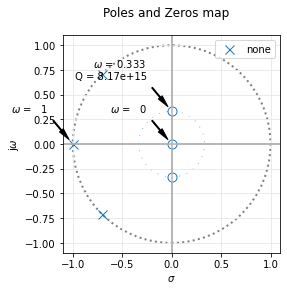

In [7]:
# Transferencia PA de plantilla

K = 3
w01 = 1  
Q1 = np.sqrt(2)/2

numerador1 =   [1,   0   , (w01/K)**2]
denominador1 = [1, w01/Q1, w01**2]
numerador2 = [1 , 0]
denominador2 = [1, w01]

numerador = np.polymul(numerador1 , numerador2)
denominador = np.polymul(denominador1 , denominador2)

my_tf1 = TransferFunction(numerador, denominador)

bodePlot(my_tf1,1)

pzmap(my_tf1,2)

## Transferencia de la estructura pedida

In [5]:
from IPython.display import IFrame
IFrame("./pdf/Tc2Ts6.pdf", width=1000, height=500)

#### De la cual podemos deducir que:

$ W_0 = \frac{1}{C} \cdot \sqrt{\frac{1}{R_2 \cdot R_5}} $  
$ Q   = R_1 \cdot \sqrt{\frac{1}{R_2 \cdot R_5}} $  
$ zero = \sqrt{R_1 - R_2}{ C^2 \cdot R_5 \cdot R_2} $  

#### Calculando los componentes:
Partiendo del zero:
$ R_2 = R_1 \cdot (1 - \frac{1}{9 \cdot W_0^2}) $  
$ W_0 = 1 $  
$ R_2 = \frac{8}{9} \cdot R_1 $  
Reemplazando en la ecuación del Q:
$ R_5 = 2,25 \cdot R_1 $  
De W0:
$ C = 0,7071 \cdot R_1 $

## Simulacion de la estructura propuesta

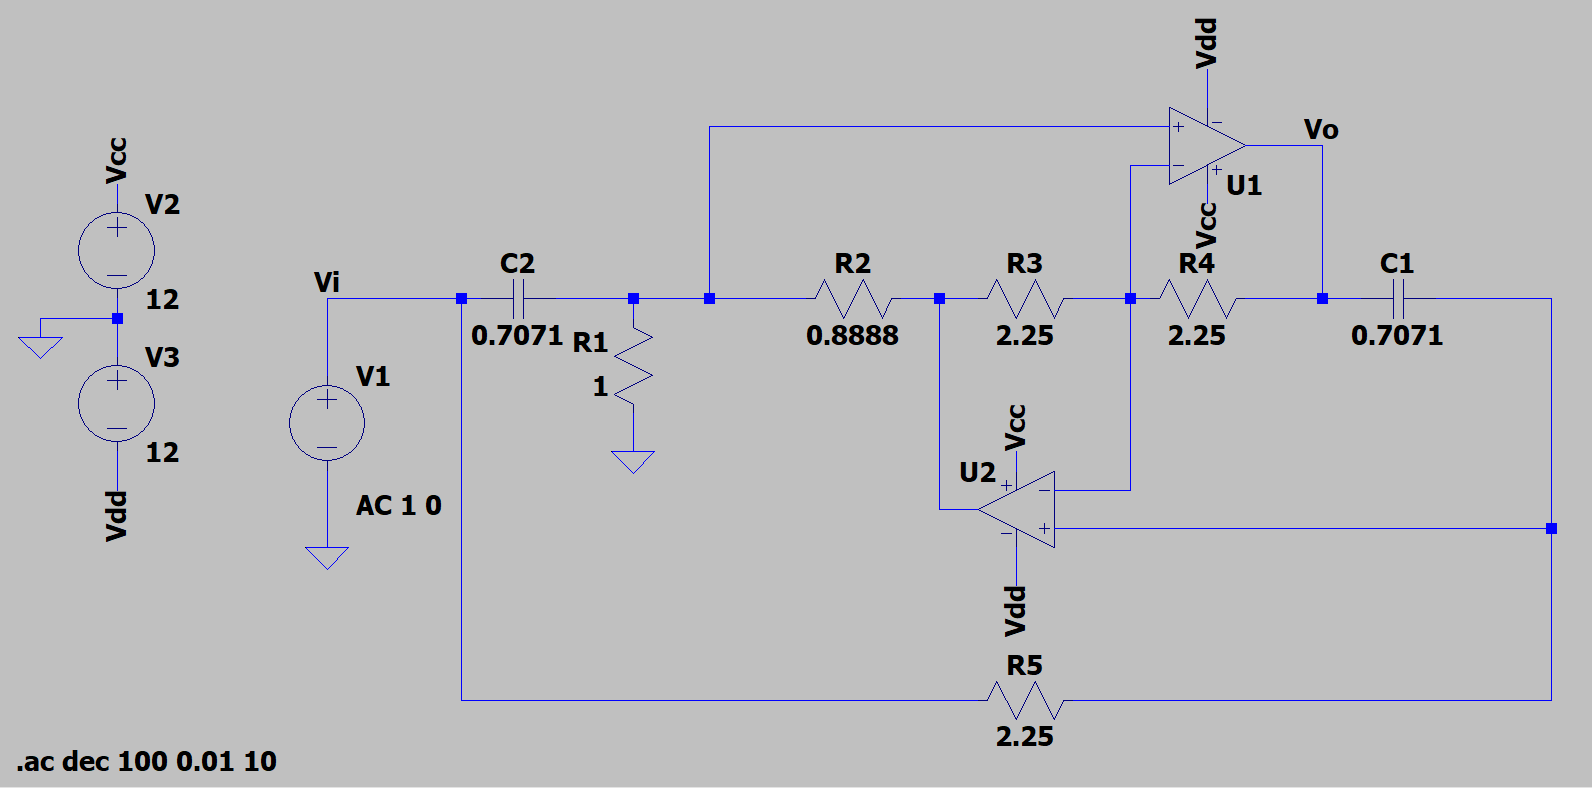
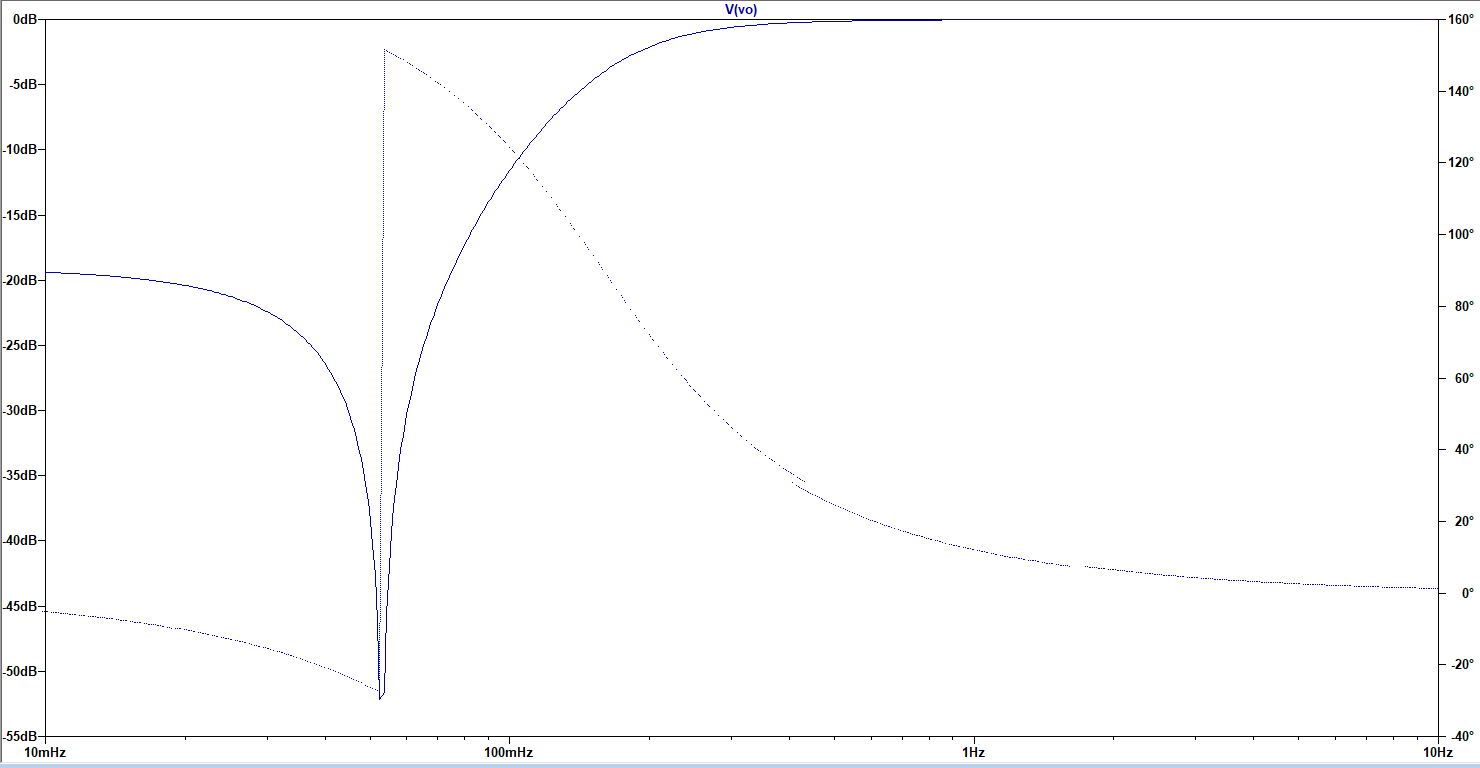

### Agregando el filtro de primer orden para conseguir la transferencia deseada
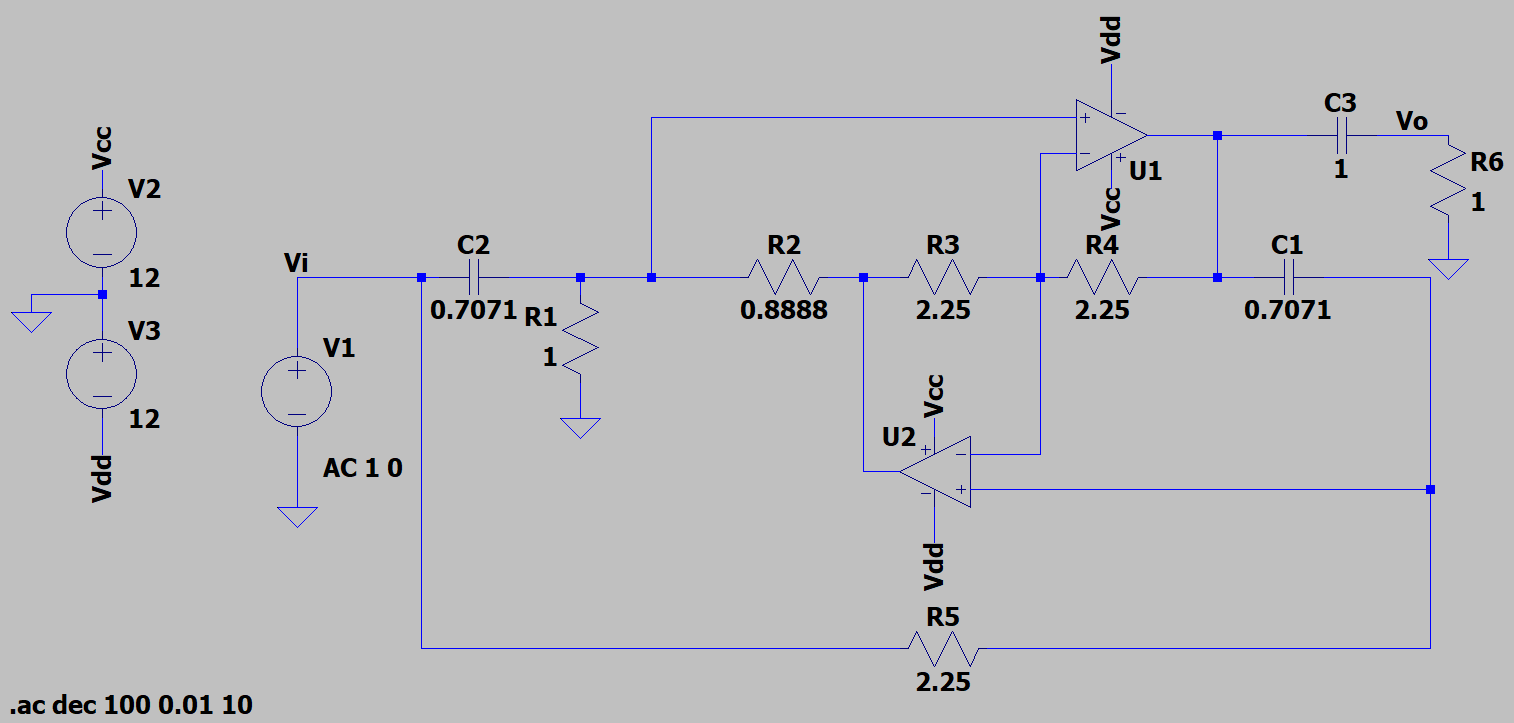
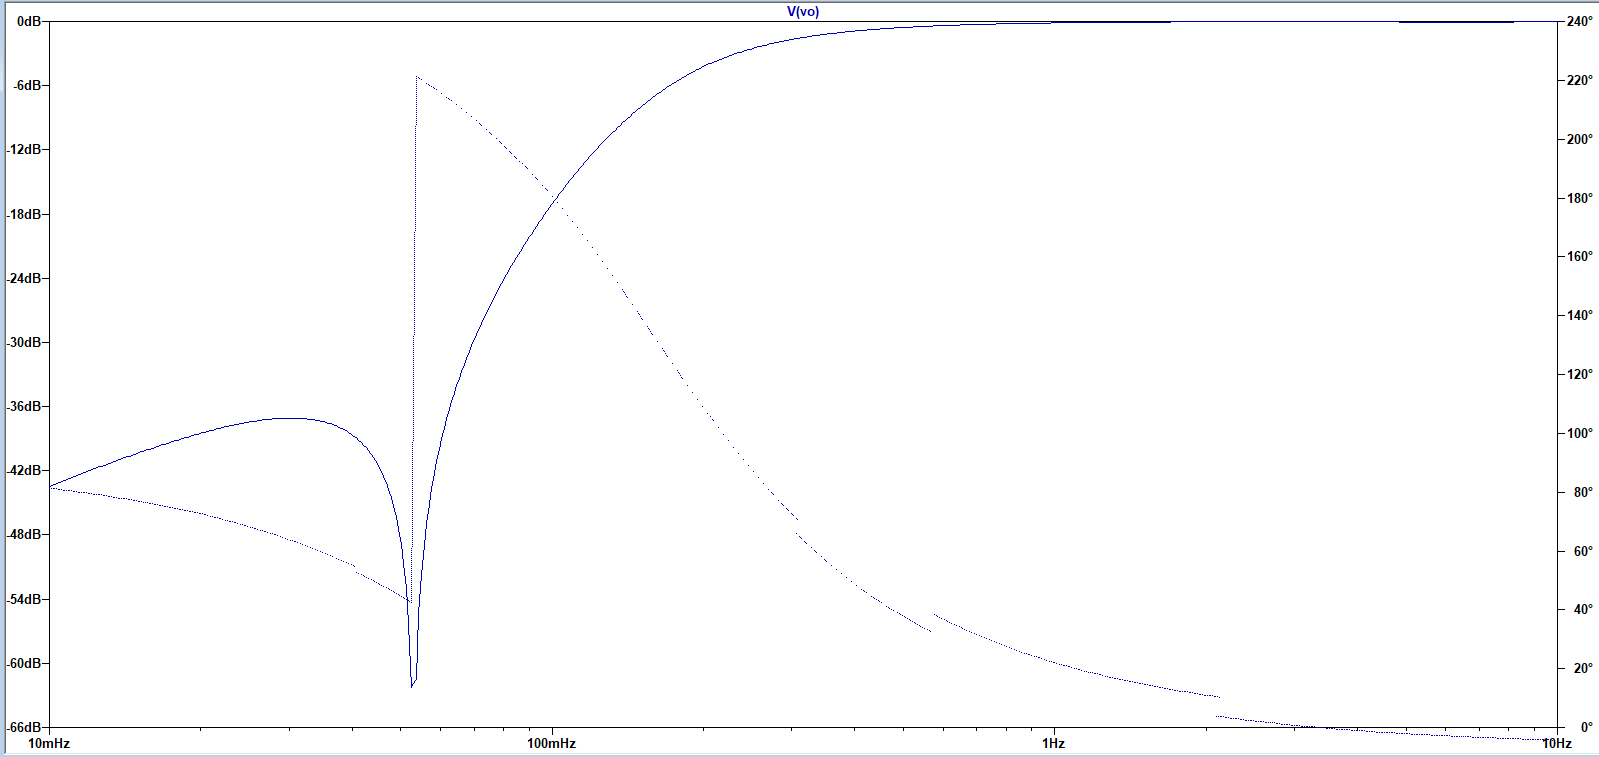

### Estructura propuesta por Schaumann

 <div>
<img src="img/redPropuestaShaumanTs6.PNG" alt="Drawing" style="width: 600px;"/>
</div>

$ T(s) = \frac{V_2}{V_1} = \frac{s^2 \cdot (2a - c) + s \cdot \frac{W_0}{Q} \cdot (2b - c) + c \cdot W_0^2}{s^2 + s \cdot \frac{W_0}{Q} + W_0^2 } $  

Como primera comparación se puede observar que con la estructura propuesta por el Schaumann se puede armar cualquier tipo de respuestas, mientras que con la nuestra estamos limitados a un eliminabanda.
Derecho nuestro circuito podría ser como el de Schaumann en modo Notch pero sin partir la resistencia de entrada y cambiando la ubicación del capacitor en el GIC. Lo que si en este nuevo circuito veo un poco más dificil posicionar el zero comparado de antes donde se tocaba el zero sin tocar nada más.
Ocurre también que la respuesta de fase de este circuito no es igual al que veniamos planteando

Calculo
$ c = \frac{1}{9} $ para ubicar el zero   
$ b = \frac{c}{2} $ para que sea elimina banda y $ a = \frac{1 + c}{2} $

### Simulación
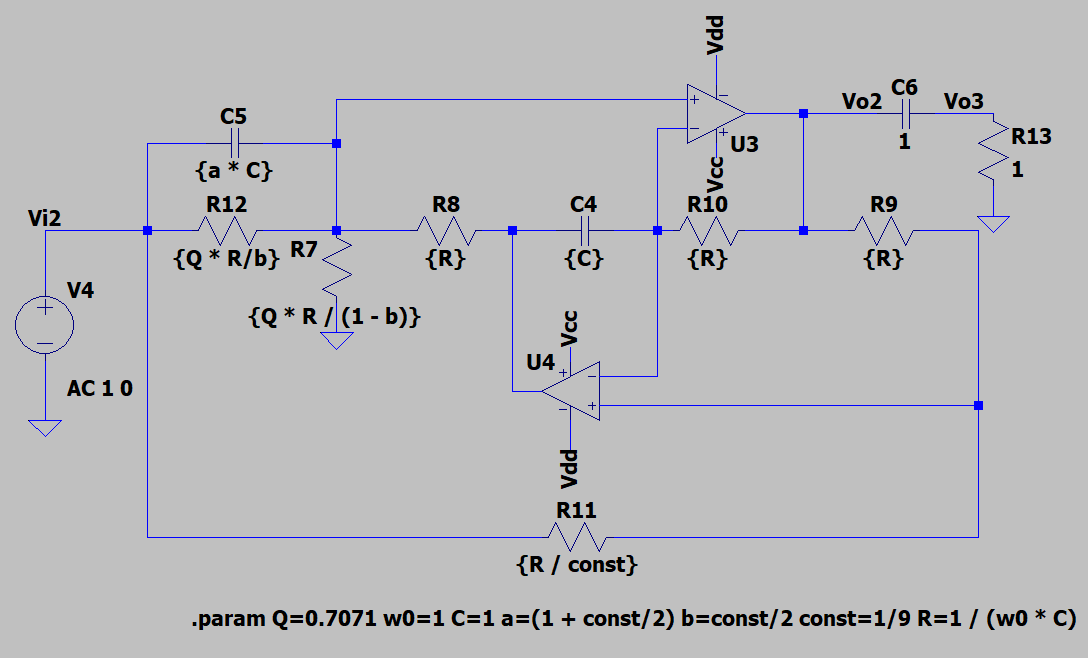
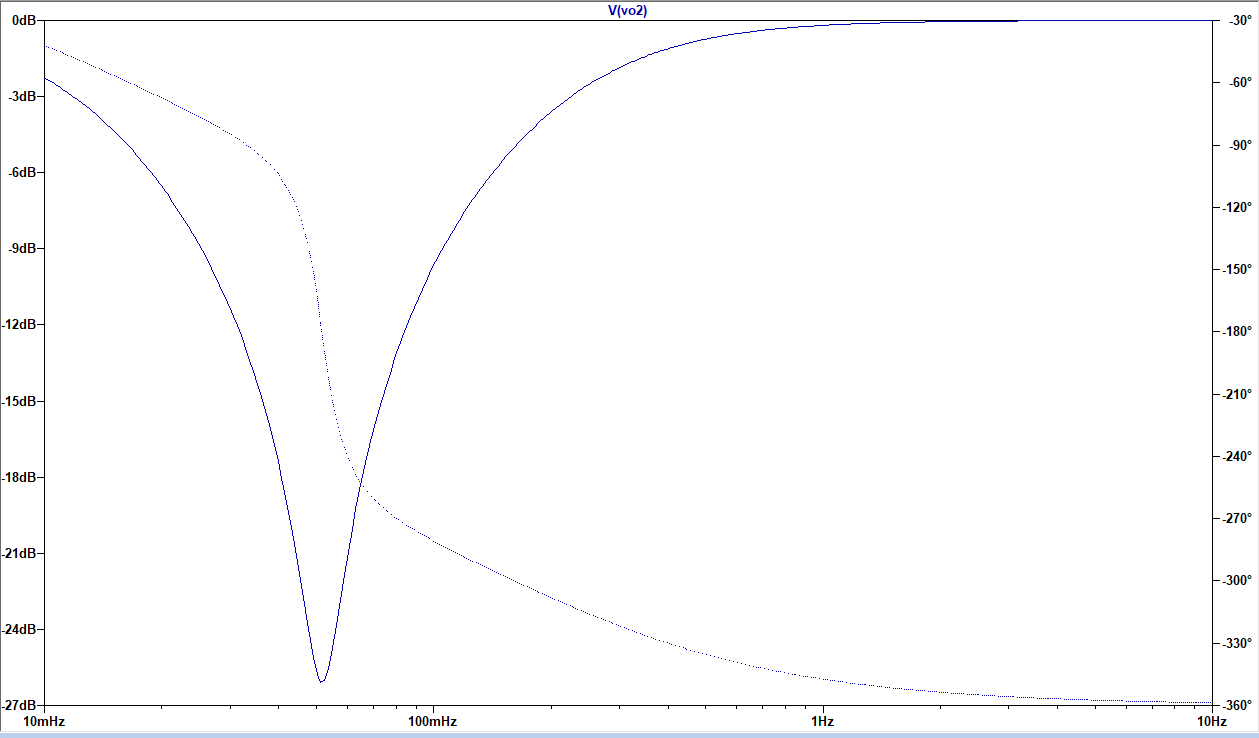
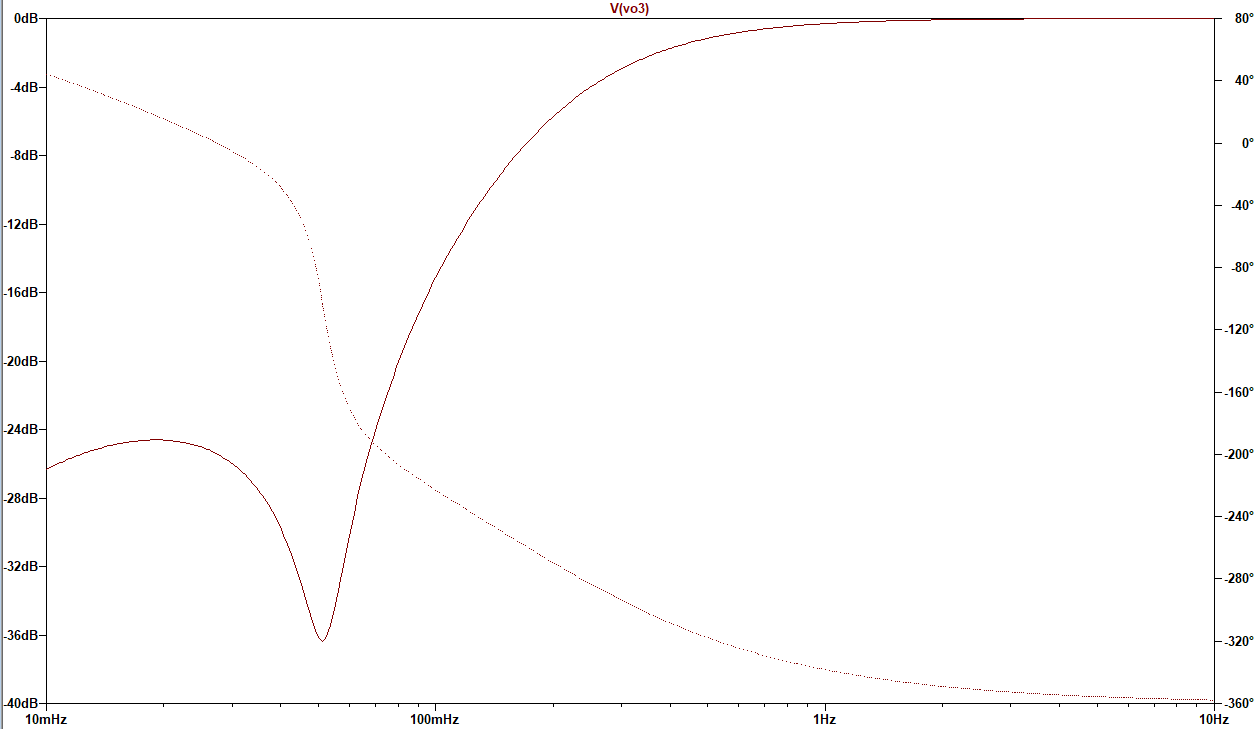